# Data Science and Statistical Modelling

# Libraries

In [2]:
# Builtin Libraries
import sys
import warnings

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

## Libraries Configuragion

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

# A. Python
## Traffic Accidents

### 1. Download and import traffic accidents data

In [4]:
accidents = pd.read_csv("C:/Users/CyberCraft Academy/Downloads/dft-road-casualty-statistics-accident-2019.csv")
accidents.head(2)

C:\Users\CyberCraft Academy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,2,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2019010128300,2019,10128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,2,E01004762
1,2019010152270,2019,10152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,9,E09000022,E09000022,3,23,2,30,0,-1,-1,-1,9,9,4,1,1,0,0,1,3,2,E01003117


## Data Cleaning

In [5]:
#check duplicates
accidents.duplicated().sum()

0

In [7]:
#check null values
accidents.isna().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          28
location_northing_osgr                         28
longitude                                      28
latitude                                       28
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [6]:
#check mode of missing values
accidents['location_easting_osgr'].value_counts()

533465.0    8
530857.0    7
532537.0    7
527553.0    7
531125.0    7
           ..
511188.0    1
459841.0    1
582459.0    1
540039.0    1
526073.0    1
Name: location_easting_osgr, Length: 93266, dtype: int64

In [7]:
accidents['location_northing_osgr'].value_counts()

180992.0    9
181092.0    9
182780.0    9
180819.0    9
180979.0    8
           ..
190665.0    1
234511.0    1
166810.0    1
319638.0    1
429702.0    1
Name: location_northing_osgr, Length: 93874, dtype: int64

In [8]:
accidents['longitude'].value_counts()

-1.909639    4
-1.594158    4
-2.715409    4
-1.475040    4
-1.176676    4
            ..
-3.423602    1
-2.106844    1
-1.426521    1
-1.949088    1
-0.430167    1
Name: longitude, Length: 115009, dtype: int64

In [9]:
accidents['latitude'].value_counts()

51.450232    6
53.810623    4
51.565088    4
51.573784    4
51.473943    4
            ..
50.350008    1
51.460346    1
51.626044    1
53.795041    1
53.792562    1
Name: latitude, Length: 113563, dtype: int64

In [10]:
# impute with mode
accidents['location_easting_osgr']=accidents['location_easting_osgr'].fillna(1)
accidents['location_northing_osgr']=accidents['location_northing_osgr'].fillna(1)
accidents['longitude']=accidents['longitude'].fillna(4)
accidents['latitude']=accidents['latitude'].fillna(1)

In [13]:
#recheck the clean data
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               117536 non-null  object 
 1   accident_year                                117536 non-null  int64  
 2   accident_reference                           117536 non-null  object 
 3   location_easting_osgr                        117536 non-null  float64
 4   location_northing_osgr                       117536 non-null  float64
 5   longitude                                    117536 non-null  float64
 6   latitude                                     117536 non-null  float64
 7   police_force                                 117536 non-null  int64  
 8   accident_severity                            117536 non-null  int64  
 9   number_of_vehicles                           117536 non-nul

In [11]:
accidents.isna().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [12]:
accidents[accidents.duplicated()]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location


### 2.General

### i) How many accidents happened in 2019?

In [13]:
accidents[accidents.accident_year==2019].shape[0]

117536

There were $117,536$ accidents in 2019.

### ii) What are the column names in the data frame?

In [14]:
accidents.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

### iii) Date (day/month/year) and coordinates(longitude and latitude) of
###   of the accident in the 100th row of the dataframe

In [15]:
accidents.iloc[[99]].loc[:,['date', 'longitude', 'latitude']]

,date,longitude,latitude
99,03/01/2019,-0.264403,51.498486


### iv) Any of the columns containing information about the type of vehicles
### inolved in the accident

In [16]:
'type' in accidents.columns

False

There is no column containing information about the type of vehicles involed in the accident

## 3. Casualties

### i) Calculate the total numbers of casualties

In [17]:
# total number of casualties
print(accidents['number_of_casualties'].sum())

153158


### ii) The difference in the number of casualties between Lower Layer Super Output area (LSOA) E01032739 (City of London 001F) and E01033708 (Hackney 027G)

In [18]:
lsoa_london_001f_casualties = accidents[accidents.lsoa_of_accident_location=='E01032739'].number_of_casualties.sum()
lsoa_hackney_027g_casualties = accidents[accidents.lsoa_of_accident_location=='E01033708'].number_of_casualties.sum()
diff_london_hackney_casualties = abs(lsoa_london_001f_casualties-lsoa_hackney_027g_casualties)

print(f"""Number of Casualties in LSOA E01032739 city of London:\t {lsoa_london_001f_casualties}
Number of Casualties in LSOA E01033708 Hackney 027G:\t {lsoa_hackney_027g_casualties}
Difference in the number of casualties between the two:\t {diff_london_hackney_casualties}""")

Number of Casualties in LSOA E01032739 city of London:	 212
Number of Casualties in LSOA E01033708 Hackney 027G:	 76
Difference in the number of casualties between the two:	 136


### iii) What LSOA saw the highest total number of casualties in 2019?

In [19]:
accidents.groupby('lsoa_of_accident_location').number_of_casualties.sum().sort_values(ascending=False).head(1)

lsoa_of_accident_location
-1    3871
Name: number_of_casualties, dtype: int64

LSOA -1 saw the highest total number of casualties (3871) in 2019

## 4. Police officer attendance

### i) Possible values that occur in the column Did_Police_officer_Attend_Scene_Of_Accident
###  and how often each value occurs

In [20]:
# possible values in the column Did_Police_officer_Attend_Scene_Of_Accident
accidents['did_police_officer_attend_scene_of_accident'].unique()

array([3, 1, 2], dtype=int64)

The possible values are integers containing the numbers ranging from 1 to 3, ie (1, 2 and 3)

In [21]:
# How often each value occurs 
accidents['did_police_officer_attend_scene_of_accident'].value_counts()

1    81309
2    26285
3     9942
Name: did_police_officer_attend_scene_of_accident, dtype: int64

In [22]:
accidents.did_police_officer_attend_scene_of_accident.value_counts(normalize=True)

1    0.691780
2    0.223634
3    0.084587
Name: did_police_officer_attend_scene_of_accident, dtype: float64

1 occured $81,309$ times which is $69%$, 2 $26, 285$ times (22%) and 3 (9942 times) which is 8%

### Meaning of the other values in the `Did_Police_officer_Attend_Scene_Of_Accident` column

- value 2 did not attend the scene of the accident
- value 3 means that it is not known whether a police officer attended or did not attend scene of accident

### iii) fraction of accidents attended by a police officer


In [23]:
(accidents.did_police_officer_attend_scene_of_accident==1).mean()

0.6917795398856521

above $\frac{69}{100}$ of the accidents were attended by a police officier.

### iv) fraction of accidents attended by a police officer on a weekday and how the number compare to the corresponding fraction of accidents on weekends

In [24]:
(accidents[accidents.day_of_week<6]['did_police_officer_attend_scene_of_accident']==1).mean()

0.6897882398340649

About 69% of the accidents happen on weekdays, therefore the remaining 31% happen during the weekends.

## 5. Visualization

### i) scatter plot of Latitude vs Longitude 

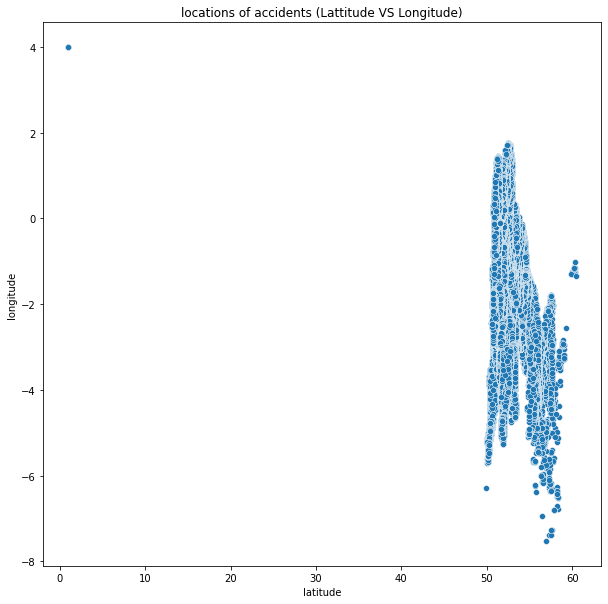

In [25]:
fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(x='latitude', y='longitude', data=accidents).set(
    ylabel='longitude', xlabel='latitude',title='locations of accidents (Lattitude VS Longitude)'
)
plt.show()                                                              

### iv)

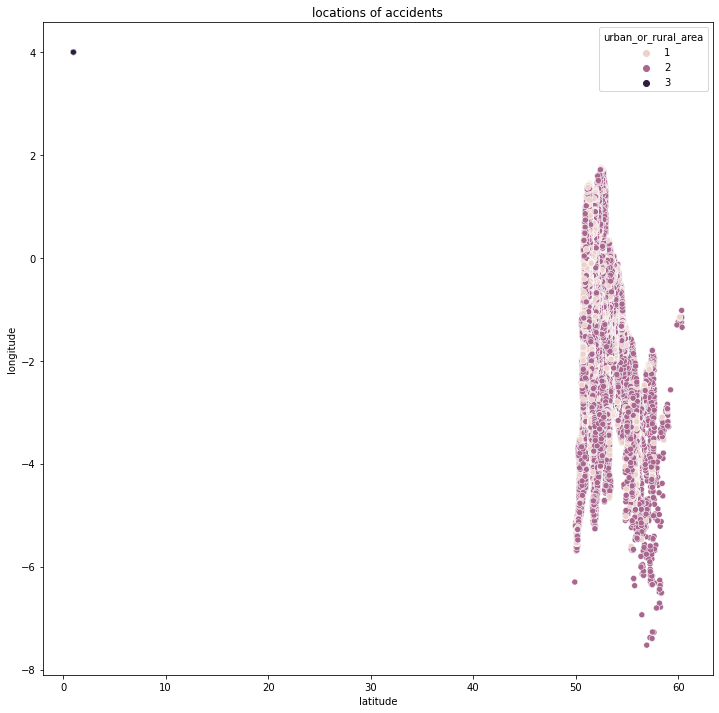

In [27]:
plt.figure(figsize = (12,12))
sns.scatterplot(x='latitude', y='longitude', data=accidents, hue = 'urban_or_rural_area')
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.title('locations of accidents')
#plt.text('Exeter', marker = 'r')
plt.show()

### iii) Are accidents at higher speed limits more likely to be fatal than at lower speeds?

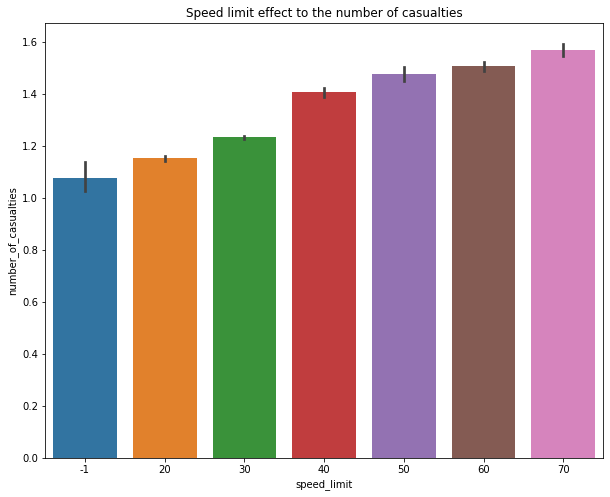

In [28]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'speed_limit', y = 'number_of_casualties', data = accidents)
plt.title("Speed limit effect to the number of casualties")
plt.show()

From the above plot, every speed limit courses fatality, as the speed limit increases, the number of fatality also increases, therefore, it is evident that  accidents at higher speed limits more likely to be fatal than at lower speed limits.

## Gym exercise and physiology data

In [29]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()

## 6. Regression Analysis

### (i) authors last name and year of study

In [30]:
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
excercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



The authors last name is **Tenenhaus**, the year of study that the data first appeared is $1998$

### (ii) fitting simple linear regression model and reporting the fitted regression coeffiecients and slope interpretation

In [31]:
X = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
X.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [32]:
y = pd.DataFrame(linnerud.target, columns=linnerud.target_names)
y.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


In [33]:
lm = LinearRegression()
lm.fit(X.Chins.values.reshape((-1,1)),y.Weight)

LinearRegression()

In [52]:
lm.coef_

array([-1.82013372])

The fitted regression coefficient is negative, regression coefficient gives the slope coefficient.  A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

### (iii)  middle-aged male, 170 pounds (“Weight”), 32 inch waist size (“Waist”), and aresting heart rate of 70 (“Pulse”)? How many chin-ups (“Chins”) do you think he can do?

In [34]:
X_train = pd.DataFrame(linnerud.target, columns=linnerud.target_names)
X_train.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


In [35]:
y_train = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)['Chins']
y_train.head()

0     5.0
1     2.0
2    12.0
3    12.0
4    13.0
Name: Chins, dtype: float64

In [36]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

# predict the number of chinups the middle aged man can do
X_test = pd.DataFrame([[170, 32, 70]], columns=linnerud.target_names)
pred = lr2.predict(X_test)
pred

array([13.45840241])

 The lecturer, a middle-aged male, with 170 pounds (“Weight”), 32 inch waist size (“Waist”), and a
resting heart rate of 70 (“Pulse”) can do approximately 13 chin-ups

## 7. Dimensionality Reduction

### (i) What linear combination $\alpha_w$ W +$\alpha_c$ C +$\alpha_p$ P of the physiological variables weight W, waist circumference C and pulse P has the highest possible variance among all possible linear transformations?

In [37]:
pca = PCA(n_components=3, random_state=42)
pca.fit(X_train)
print(pca.explained_variance_)
np.round(pca.explained_variance_ratio_,2)

[624.93238458  44.48783784   2.44293548]


array([0.93, 0.07, 0.  ])

linear compination $\alpha_w$ W has the highest variance ration of 0.93, followed by $\alpha_c$ C by of 0.07

### (ii) What might the interpretation of this one-dimensional representation of a person’s physiological factors be, and in what context could it be useful?

A person's weight is the causation of all the factors it is influenced by  level of physical activity, diet, and some environmental and social factors and all this affect the waist and pulse of a person.

### What is the variance of the linear combination with αw = αc = αp = $\sqrt{\frac{1}{3}}$ and how does this variance compare to the variance of the linear combination calculated in question 7(i)?

In [38]:
pca2 = PCA(n_components=1, random_state=3)
pca2.fit(X_train)
print(pca2.explained_variance_)
pca2.explained_variance_ratio_

[624.93238458]


array([0.93014832])

With the stated linear combination, it'll result to 1 feature that maximizes the variance